<a href="https://colab.research.google.com/github/gvtsch/Recurrent_Neural_Networks/blob/main/RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict MNIST Data using RNNs

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

## Load dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


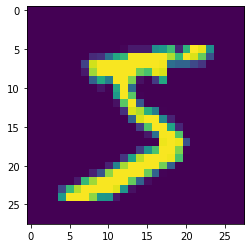

In [ ]:
# What does an image look like?
plt.imshow(x_train[0])

## Augment train_data

BEFORE:



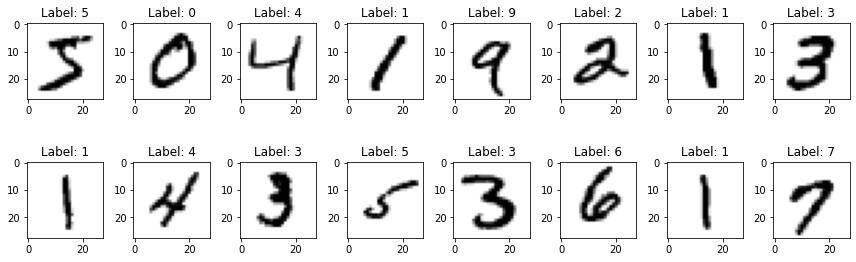

AFTER:



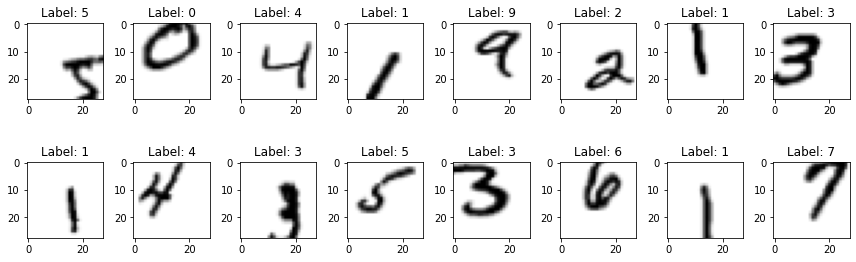

In [ ]:
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=False)

# fit the generator
datagen.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(x_train.reshape(x_train.shape[0], 28, 28, 1), 
                         y_train.reshape(y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

In [ ]:
# What does one row look like?
x_train[0][14, :]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.31764706, 0.94117647,
       0.99215686, 0.99215686, 0.46666667, 0.09803922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

## Preprocess data

In [ ]:
# Rescale
# x_train = x_train/255.
# x_test = x_test/255.

In [ ]:
# x_train.shape[1:]

(28, 28)

## Build the model

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation="relu", return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In this model we're passing the mnist picture's rows as a sequence into our model. So we're showing the model one row after the other (in order) and have it make a prediction.

> 🔑 **Note:** `return_sequences` is a flag used when you're continuing on to another recurrent layer. Then you want to return sequences.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_3 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)

## Train the model

In [ ]:
history=model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_data=(x_test, y_test),
)

Epoch 1/5
1875/1875 [==============================] - 90s 47ms/step - loss: 0.5805 - accuracy: 0.8147 - val_loss: 0.1148 - val_accuracy: 0.9654
Epoch 2/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.1517 - accuracy: 0.9590 - val_loss: 0.0920 - val_accuracy: 0.9742
Epoch 3/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1066 - accuracy: 0.9714 - val_loss: 0.0743 - val_accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0820 - accuracy: 0.9790 - val_loss: 0.0530 - val_accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0675 - accuracy: 0.9817 - val_loss: 0.0740 - val_accuracy: 0.9799


In [ ]:
history.history

{'accuracy': [0.8147000074386597,
  0.9589999914169312,
  0.9714499711990356,
  0.978950023651123,
  0.9817333221435547],
 'loss': [0.5804558992385864,
  0.15166310966014862,
  0.1066107526421547,
  0.08197616040706635,
  0.06754425913095474],
 'val_accuracy': [0.965399980545044,
  0.9742000102996826,
  0.9786999821662903,
  0.9840999841690063,
  0.9799000024795532],
 'val_loss': [0.11475974321365356,
  0.09203369170427322,
  0.07427762448787689,
  0.05298807471990585,
  0.07396813482046127]}